In [1]:
import numpy as np
import numpy.linalg as la
import graph
import helper_function as hf
import matplotlib.pyplot as plt

# The Gambler's Ruin and Reducibility

Consider a gambler starting with some amount of money, say $\$1$.

The gambler is playing a game where they could either win $\$1$ or lose $\$1$ with equal probability.  The goal is to win $\$3$ before losing all of his money, in which case they lose the game as well.

We can represent this as a state graph (see below).  If we start at the $\$1$ state, we have a $50\%$ chance of losing money (and the game) &mdash; the "$\$0$ (Lose)" state &mdash; and a $50\%$ chance of winning a dollar &mdash; the "$\$2$" state.

<img src="Gambler.svg"></img>

**Check your answers!**

Create the Markov matrix, denoted `G`, that follows the state diagram above.

In [2]:
#grade_clear
G = np.array([[1, 0.5,   0, 0],
              [0,   0, 0.5, 0],
              [0, 0.5,   0, 0],
              [0,   0, 0.5, 1]])

You can display your matrix as a graph to check your work.

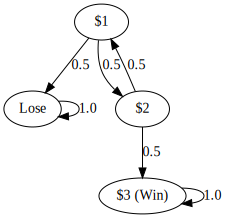

In [3]:
labels = ['Lose', '$1', '$2', '$3 (Win)']
graph.draw_matrix(G, labels)

Suppose the gambler starts with $\$1$ ($100\%$ probability of being in the $\$1$ state). Write the initial state as the array `x0`:

In [4]:
x0 = np.array([0.0, 1.0, 0.0, 0.0])

We will use the function `power_iteration` that you defined previously (and now available to you as a helper function) to get the probability of losing and winning using the initial state defined as `x0` and store your result in `xstar1`

In [5]:
# define xstar1
#clear
xstar1 = hf.power_iteration(G,x0)
#clear

# Print out the probability
print(np.round(xstar1 * 100,2))

[66.67  0.    0.   33.33]


**Check your answers!**

Now use power iteration to get the probability of winning and losing if the gambler starts with $\$2$ instead. Store your result in `xstar2`.

In [6]:
#grade_clear
xstar2 = hf.power_iteration(G, np.array([0.0, 0.0, 1.0, 0.0]))

Print out `xstar2`. Is this result different from `xstar1`?

In [7]:
print(np.round(xstar2 * 100, 2))

[33.33  0.    0.   66.67]


Because we can no longer reach every state from every other state, **we no longer have a unique steady state**.  A Markov chain of this type is said to be "reducible".

The code snippet below runs power iteration for a random initial state vector. Run it many times, and see what happens to the resulting vector:

In [8]:
x = np.random.rand(4)
x = x / la.norm(x,1)
print(np.round(hf.power_iteration(G, x),2))

[0.59 0.   0.   0.41]


We can no longer observe the behavior in which the steady state vector is the same, no matter the given initial vector.
